# Instalacja detectronu 2

In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-etvkq4fd
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-etvkq4fd
     |████████████████████████████████| 636 kB 5.3 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=64553 sha256=02f81b9a898225191eddaeddeb603b51d7daf21d3962051338aeb2f5ded8f273
  Stored in directory: /tmp/pip-ephem-wheel-cache-_97e3c3o/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
Successfully built fvcore
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


'1.9.0+cu102'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 13028, done.
remote: Counting objects: 100% (529/529), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 13028 (delta 307), reused 440 (delta 272), pack-reused 12499
Receiving objects: 100% (13028/13028), 5.59 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (9267/9267), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 145 kB 11.0 MB/s 
     |████████████████████████████████| 130 kB 47.5 MB/s 
     |████████████████████████████████| 745 kB 37.1 MB/s 
     |████████████████████████████████| 743 kB 36.0 MB/s 
     |████████████████████████████████| 112 kB 50.8 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=a690045beec213eda9890e14f017e66623b0f7c4aaa92c2c19c39fa36c988a0d
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb

Przed uruchomieniem komórek poniżej należy uruchomić ponownie środowisko wykonawcze

In [ ]:
!gdown --id 1e4BeNEsTONy5oL7Q1O-dRurk8K_l4zJw
!unzip -qo mobilenet.zip
!rm -f mobilenet.zip

Downloading...
From: https://drive.google.com/uc?id=1e4BeNEsTONy5oL7Q1O-dRurk8K_l4zJw
To: /content/mobilenet.zip
100% 11.2k/11.2k [00:00<00:00, 9.35MB/s]


## Import bibliotek

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random
import tqdm
import os


from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances

from mobilenet.utils import  add_mobilenet_config, build_mobilenetv2_fpn_backbone

## Ściagnięcie oraz rejestracja własnych datasetów w formacie COCO



In [ ]:
!gdown --id 1c5vXk-WL75t8xHXB9Wj8nZoFzAg7YCBl
!gdown --id 1ajodZ943qLLd0rR31g4pD99tkQNMatVF
!unzip volleyball_difficult.zip
!unzip volleyball_easy.zip

Downloading...
From: https://drive.google.com/uc?id=1c5vXk-WL75t8xHXB9Wj8nZoFzAg7YCBl
To: /content/volleyball_easy.zip
39.3MB [00:00, 54.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ajodZ943qLLd0rR31g4pD99tkQNMatVF
To: /content/volleyball_difficult.zip
98.3MB [00:01, 66.7MB/s]
Archive:  volleyball_difficult.zip
   creating: volleyball_difficult/
   creating: volleyball_difficult/test/
  inflating: volleyball_difficult/test/VID_20200914_223523-003_jpg.rf.7be0c2e2d1ab6a8357324ed8da6b3023.jpg  
  inflating: volleyball_difficult/test/VID_20200914_223523-009.rf.704d547ecf12e7c7d32143728be702cc.jpg  
  inflating: volleyball_difficult/test/VID_20200914_223523-025.rf.1064ee05f5dfc5d52f89011fc3a764a1.jpg  
  inflating: volleyball_difficult/test/VID_20200914_223523-025_jpg.rf.526c554290e87bf6a6c81ede03206b63.jpg  
  inflating: volleyball_difficult/test/VID_20200914_223523-027.rf.ef9fcf26c60675ba23f7721dcbc1757e.jpg  
  inflating: volleyball_difficult/test/VID_20200914_223523-028.r

In [ ]:
register_coco_instances("volleyball_easy_train", {}, "/content/volleyball_easy/train/_annotations.coco.json", "/content/volleyball_easy/train")
register_coco_instances("volleyball_easy_test", {}, "/content/volleyball_easy/test/_annotations.coco.json", "/content/volleyball_easy/test")
register_coco_instances("volleyball_difficult_train", {}, "/content/volleyball_difficult/train/_annotations.coco.json", "/content/volleyball_difficult/train")
register_coco_instances("volleyball_difficult_test", {}, "/content/volleyball_difficult/test/_annotations.coco.json", "/content/volleyball_difficult/test")

In [ ]:
volleyball_easy_train_metadata = MetadataCatalog.get("volleyball_easy_train")
dataset_dicts = DatasetCatalog.get("volleyball_easy_train")
volleyball_easy_test_metadata = MetadataCatalog.get("volleyball_easy_test")
dataset_dicts2 = DatasetCatalog.get("volleyball_easy_test")
volleyball_difficult_train_metadata = MetadataCatalog.get("volleyball_difficult_train")
dataset_dicts3 = DatasetCatalog.get("volleyball_difficult_train")
volleyball_difficult_test_metadata = MetadataCatalog.get("volleyball_difficult_test")
dataset_dicts4 = DatasetCatalog.get("volleyball_difficult_test")

print(volleyball_easy_train_metadata)
print(volleyball_easy_test_metadata)
print(volleyball_difficult_train_metadata)
print(volleyball_difficult_test_metadata)

[09/19 08:44:23 d2.data.datasets.coco]: Loaded 1200 images in COCO format from /content/volleyball_easy/train/_annotations.coco.json
[09/19 08:44:23 d2.data.datasets.coco]: Loaded 100 images in COCO format from /content/volleyball_easy/test/_annotations.coco.json
[09/19 08:44:23 d2.data.datasets.coco]: Loaded 914 images in COCO format from /content/volleyball_difficult/train/_annotations.coco.json
[09/19 08:44:23 d2.data.datasets.coco]: Loaded 51 images in COCO format from /content/volleyball_difficult/test/_annotations.coco.json
Metadata(evaluator_type='coco', image_root='/content/volleyball_easy/train', json_file='/content/volleyball_easy/train/_annotations.coco.json', name='volleyball_easy_train', thing_classes=['Ball'], thing_dataset_id_to_contiguous_id={1: 0})
Metadata(evaluator_type='coco', image_root='/content/volleyball_easy/test', json_file='/content/volleyball_easy/test/_annotations.coco.json', name='volleyball_easy_test', thing_classes=['Ball'], thing_dataset_id_to_contiguou

Przykładowe zdjęcia z "łatwego" zestawu


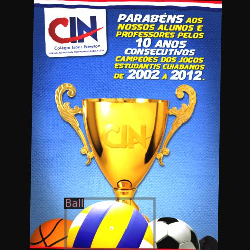

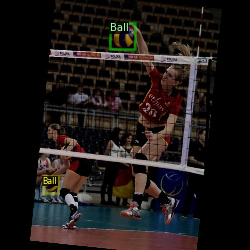

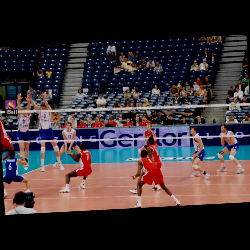

Przykładowe zdjęcia z "trudnego" zestawu


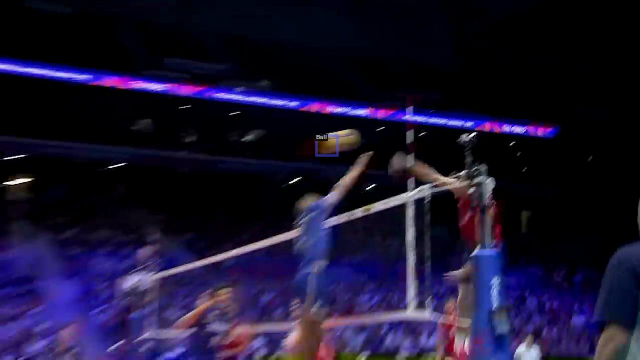

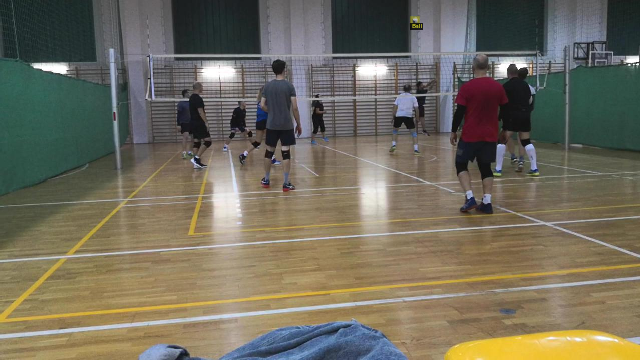

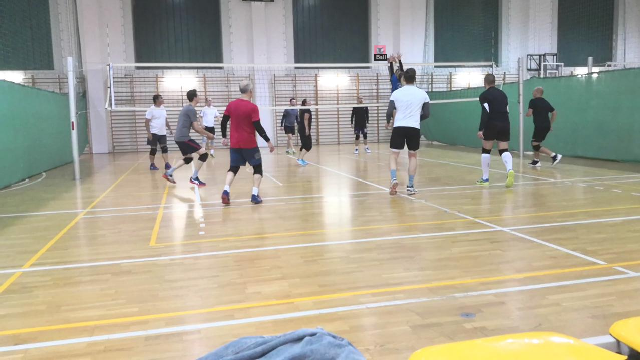

In [ ]:
print('Przykładowe zdjęcia z "łatwego" zestawu')
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=volleyball_difficult_test_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])
print('Przykładowe zdjęcia z "trudnego" zestawu')
for d in random.sample(dataset_dicts3, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=volleyball_difficult_test_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

#Trenowanie modelu na "prostym" datasecie

In [ ]:
cfg = get_cfg()
add_mobilenet_config(cfg)
cfg_file='faster_rcnn_Mv2_FPNLite_3x.yaml'
cfg.merge_from_file('mobilenet/configs/'+cfg_file)
cfg.DATASETS.TRAIN = ("volleyball_easy_train",)
cfg.DATASETS.TEST = ('volleyball_easy_test',)
cfg.DATALOADER.NUM_WORKERS = 2


cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.005
cfg.SOLVER.MAX_ITER = 4000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 # ball class
cfg.OUTPUT_DIR = 'model_mobilenet_easy'

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

WARNING [09/19 08:44:29 d2.config.compat]: Config 'mobilenet/configs/faster_rcnn_Mv2_FPNLite_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[09/19 08:44:38 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(24, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): MobileNetV2(
      (features): ModuleList(
        (0): Sequential(
   

mobilenet_v2_detectron2.pth?dl=1: 9.08MB [00:01, 5.67MB/s]                            
Some model parameters or buffers are not found in the checkpoint:
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
The checkpoint state_dict contains keys that are not used by the model:
  backbone.bottom_up.features.18.0.weight
  backbone.bottom_up.features.18.1.{bias, running_mean, running_var, weight}


In [ ]:
trainer.train()

[09/19 08:44:41 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[09/19 08:44:51 d2.utils.events]:  eta: 0:29:23  iter: 19  total_loss: 1.176  loss_cls: 0.4585  loss_box_reg: 0.005833  loss_rpn_cls: 0.6972  loss_rpn_loc: 0.01169  time: 0.4438  data_time: 0.0186  lr: 9.9905e-05  max_mem: 1836M
[09/19 08:45:00 d2.utils.events]:  eta: 0:29:40  iter: 39  total_loss: 0.7777  loss_cls: 0.06487  loss_box_reg: 0.0001633  loss_rpn_cls: 0.6919  loss_rpn_loc: 0.007581  time: 0.4448  data_time: 0.0086  lr: 0.0001998  max_mem: 1836M
[09/19 08:45:08 d2.utils.events]:  eta: 0:29:31  iter: 59  total_loss: 0.73  loss_cls: 0.03047  loss_box_reg: 0.003868  loss_rpn_cls: 0.6803  loss_rpn_loc: 0.007623  time: 0.4410  data_time: 0.0098  lr: 0.0002997  max_mem: 1836M
[09/19 08:45:18 d2.utils.events]:  eta: 0:29:29  iter: 79  total_loss: 0.7102  loss_cls: 0.02939  loss_box_reg: 0.000114  loss_rpn_cls: 0.663  loss_rpn_loc: 0.009688  time: 0.4473  data_time: 0.0107  lr: 0.00039961  max_mem: 1836M
[09/19 08:45:27 d2.utils.events]:  eta: 0:29:22  iter: 99  total_loss: 0.7365  

##Tworzenie predyktora i wizualizacja rezultatów


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.DATASETS.TEST = ("volleyball_easy_test", )
predictor = DefaultPredictor(cfg)

{'instances': Instances(num_instances=1, image_height=500, image_width=500, fields=[pred_boxes: Boxes(tensor([[245.0723,  61.5467, 274.2649,  90.4839]], device='cuda:0')), scores: tensor([0.9860], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


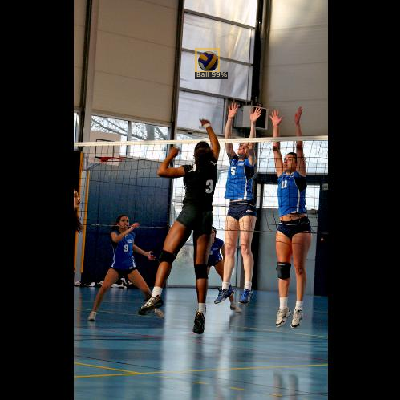

{'instances': Instances(num_instances=1, image_height=500, image_width=500, fields=[pred_boxes: Boxes(tensor([[368.9088, 215.5590, 393.1170, 236.6819]], device='cuda:0')), scores: tensor([0.9641], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


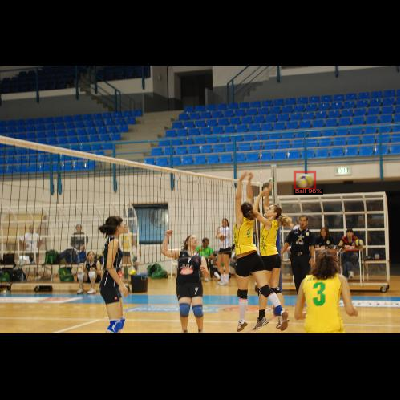

{'instances': Instances(num_instances=7, image_height=500, image_width=500, fields=[pred_boxes: Boxes(tensor([[194.5876, 102.7309, 226.4351, 136.1672],
        [205.3314, 346.8428, 219.6537, 361.3062],
        [271.0853, 327.8987, 283.1524, 339.6944],
        [270.8692, 325.6183, 296.5076, 348.6996],
        [148.1888, 338.1656, 158.4815, 351.5779],
        [201.9892, 341.3155, 221.6039, 365.1386],
        [146.1126, 339.1991, 155.7238, 348.9691]], device='cuda:0')), scores: tensor([0.9911, 0.8481, 0.8280, 0.7814, 0.6063, 0.5641, 0.5005],
       device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0, 0, 0], device='cuda:0')])}


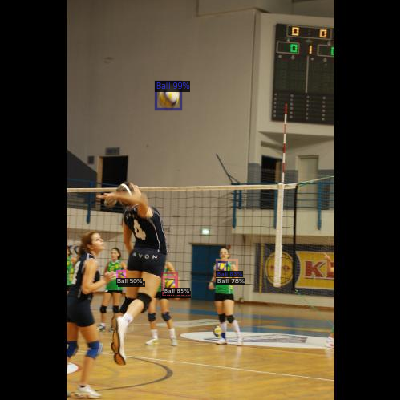

In [ ]:
for d in random.sample(dataset_dicts2, 3):
  im = cv2.imread(d["file_name"])    
  outputs = predictor(im)
  print(outputs)
  v = Visualizer(im[:, :, ::-1],
                  metadata=volleyball_easy_train_metadata, 
                  scale=0.8,
  )
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:, :, ::-1])

## Czas inferencji

In [ ]:
import time
times = []
for i in range(20):
    start_time = time.time()
    outputs = predictor(im)
    delta = time.time() - start_time
    times.append(delta)
mean_delta = np.array(times).mean()
fps = 1 / mean_delta
print("Average(sec):{:.2f},fps:{:.2f}".format(mean_delta, fps))

Average(sec):0.11,fps:9.07


##Wyniki predyktora na "prostym" datasecie

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("volleyball_easy_test", ("bbox",), False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "volleyball_easy_test")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[09/19 09:15:53 d2.data.datasets.coco]: Loaded 100 images in COCO format from /content/volleyball_easy/test/_annotations.coco.json
[09/19 09:15:53 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/19 09:15:53 d2.data.common]: Serializing 100 elements to byte tensors and concatenating them all ...
[09/19 09:15:53 d2.data.common]: Serialized dataset takes 0.03 MiB
[09/19 09:15:53 d2.evaluation.evaluator]: Start inference on 100 batches
[09/19 09:15:54 d2.evaluation.evaluator]: Inference done 11/100. Dataloading: 0.0016 s/iter. Inference: 0.0974 s/iter. Eval: 0.0003 s/iter. Total: 0.0992 s/iter. ETA=0:00:08
[09/19 09:15:59 d2.evaluation.evaluator]: Inference done 62/100. Dataloading: 0.0020 s/iter. Inference: 0.0975 s/iter. Eval: 0.0003 s/iter. Total: 0.0999 s/iter. ETA=0:00:03
[09/19 09:16:03 d2.evaluation.evaluator]: Total inference time: 0:00:09.541599 (0.100438 s / iter

##Sprawdzenie skuteczności detektora na realistycznych przykładach z "trudnego" datasetu

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("volleyball_difficult_test", ("bbox",), False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "volleyball_difficult_test")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[09/19 09:16:11 d2.data.datasets.coco]: Loaded 51 images in COCO format from /content/volleyball_difficult/test/_annotations.coco.json
[09/19 09:16:11 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    Ball    | 43           |
|            |              |
[09/19 09:16:11 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/19 09:16:11 d2.data.common]: Serializing 51 elements to byte tensors and concatenating them all ...
[09/19 09:16:11 d2.data.common]: Serialized dataset takes 0.01 MiB
[09/19 09:16:11 d2.evaluation.evaluator]: Start inference on 51 batches
[09/19 09:16:12 d2.evaluation.evaluator]: Inference done 11/51. Dataloading: 0.0017 s/iter. Inference: 0.1372 s/iter. Eval: 0.0002 s/iter. Total: 0.1391 s/iter. ETA=0:00:05
[09/19 09:16:17 d2.evaluation.evaluator]: Inference done 47/51. Data

**Trenowanie na obrazkach z openimages nie wystarczy do wytrenowania sieci na nasze potrzeby**

In [ ]:
os.rename('/content/model_mobilenet_easy/model_final.pth','/content/model_mobilenet_easy/model_final_easy.pth')

## Trenowanie modelu na "trudnym" datasecie

In [ ]:
cfg = get_cfg()
cfg_file='faster_rcnn_Mv2_FPNLite_3x.yaml'
cfg.merge_from_file('mobilenet/configs/'+cfg_file)
add_mobilenet_config(cfg)
cfg.OUTPUT_DIR = 'model_mobilenet_easy'
cfg.DATASETS.TRAIN = ("volleyball_difficult_train",)
cfg.DATASETS.TEST = ('volleyball_difficult_test',)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final_easy.pth")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.003
cfg.SOLVER.MAX_ITER = 4000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 # ball class




os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)


WARNING [09/19 09:22:51 d2.config.compat]: Config 'mobilenet/configs/faster_rcnn_Mv2_FPNLite_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[09/19 09:22:51 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(24, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): MobileNetV2(
      (features): ModuleList(
        (0): Sequential(
   

In [ ]:
trainer.train()

[09/19 09:22:54 d2.engine.train_loop]: Starting training from iteration 0
[09/19 09:23:09 d2.utils.events]:  eta: 0:47:29  iter: 19  total_loss: 0.2508  loss_cls: 0.07089  loss_box_reg: 0.06446  loss_rpn_cls: 0.06184  loss_rpn_loc: 0.02819  time: 0.7025  data_time: 0.0214  lr: 5.9943e-05  max_mem: 2919M
[09/19 09:23:23 d2.utils.events]:  eta: 0:47:15  iter: 39  total_loss: 0.2783  loss_cls: 0.04953  loss_box_reg: 0.04214  loss_rpn_cls: 0.1492  loss_rpn_loc: 0.03853  time: 0.7020  data_time: 0.0118  lr: 0.00011988  max_mem: 2919M
[09/19 09:23:36 d2.utils.events]:  eta: 0:46:49  iter: 59  total_loss: 0.1952  loss_cls: 0.06623  loss_box_reg: 0.0567  loss_rpn_cls: 0.03747  loss_rpn_loc: 0.02307  time: 0.6934  data_time: 0.0105  lr: 0.00017982  max_mem: 2919M
[09/19 09:23:50 d2.utils.events]:  eta: 0:46:20  iter: 79  total_loss: 0.2667  loss_cls: 0.05851  loss_box_reg: 0.05478  loss_rpn_cls: 0.1091  loss_rpn_loc: 0.02596  time: 0.6913  data_time: 0.0094  lr: 0.00023976  max_mem: 2919M
[09/1

In [ ]:
os.rename('/content/model_mobilenet_easy/model_final_easy.pth','/content/model_mobilenet_easy/model_final_difficult_easy.pth')

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final_difficult_easy.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set the testing threshold for this model
cfg.DATASETS.TEST = ("volleyball_difficult_test", )
predictor = DefaultPredictor(cfg)

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("volleyball_difficult_test", ("bbox",), False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "volleyball_difficult_test")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[09/19 10:09:17 d2.data.datasets.coco]: Loaded 51 images in COCO format from /content/volleyball_difficult/test/_annotations.coco.json
[09/19 10:09:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/19 10:09:17 d2.data.common]: Serializing 51 elements to byte tensors and concatenating them all ...
[09/19 10:09:17 d2.data.common]: Serialized dataset takes 0.01 MiB
[09/19 10:09:17 d2.evaluation.evaluator]: Start inference on 51 batches
[09/19 10:09:19 d2.evaluation.evaluator]: Inference done 11/51. Dataloading: 0.0018 s/iter. Inference: 0.1381 s/iter. Eval: 0.0003 s/iter. Total: 0.1402 s/iter. ETA=0:00:05
[09/19 10:09:24 d2.evaluation.evaluator]: Inference done 47/51. Dataloading: 0.0023 s/iter. Inference: 0.1381 s/iter. Eval: 0.0003 s/iter. Total: 0.1408 s/iter. ETA=0:00:00
[09/19 10:09:25 d2.evaluation.evaluator]: Total inference time: 0:00:06.517220 (0.141679 s / iter

**Stwierdzono zdecydowaną poprawę rezultatów**

## Wizualizacja

{'instances': Instances(num_instances=0, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}


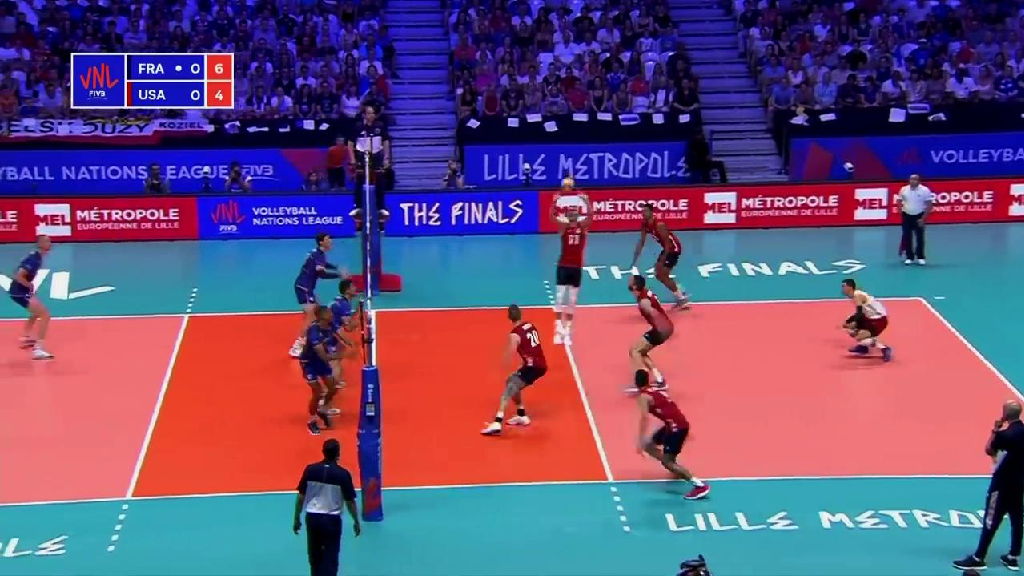

{'instances': Instances(num_instances=1, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([[204.7365, 188.9836, 258.9259, 240.3736]], device='cuda:0')), scores: tensor([0.9500], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


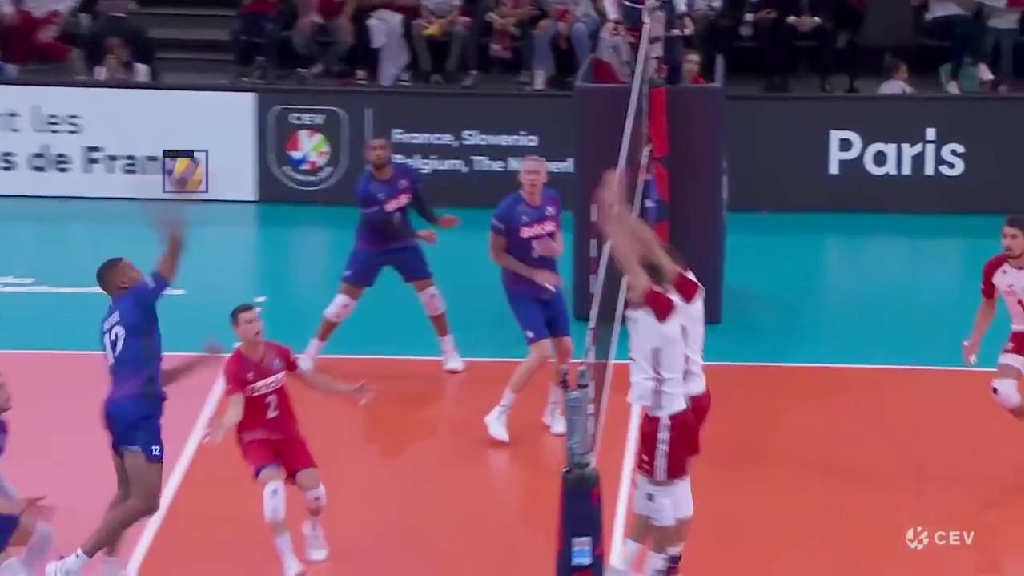

{'instances': Instances(num_instances=1, image_height=720, image_width=1280, fields=[pred_boxes: Boxes(tensor([[419.4203, 297.6677, 446.9788, 326.6677]], device='cuda:0')), scores: tensor([0.8846], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


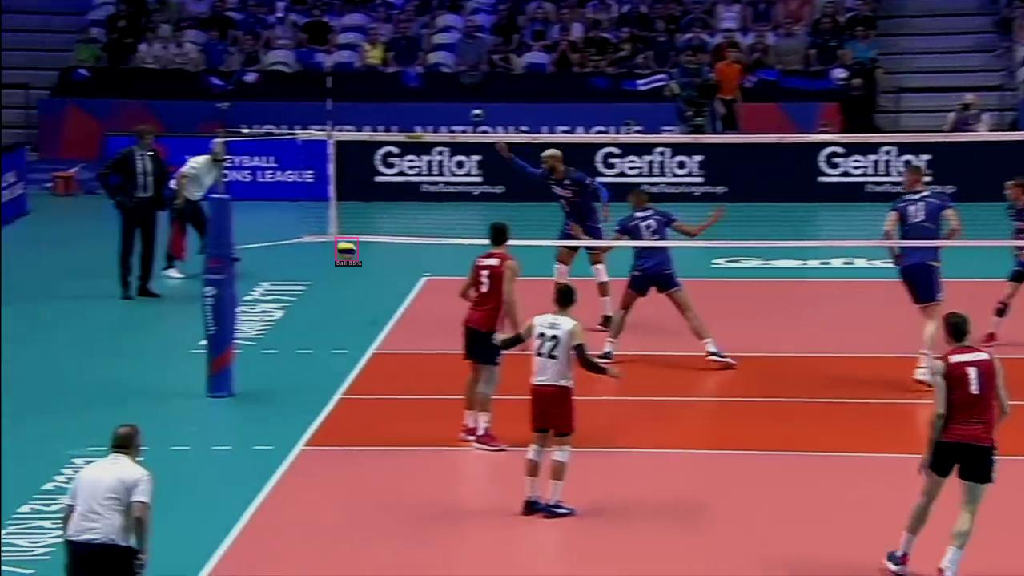

In [ ]:
for d in random.sample(dataset_dicts3, 3):
  im = cv2.imread(d["file_name"])    
  outputs = predictor(im)
  print(outputs)
  v = Visualizer(im[:, :, ::-1],
                  metadata=volleyball_easy_train_metadata, 
                  scale=0.8,
  )
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:, :, ::-1])